In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt








In [45]:
df=pd.read_csv('auto-mpg.csv')

In [46]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [47]:
df=df.drop_duplicates()
len(df)

398

In [48]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [59]:
for col in df.columns:
    print(df[col].isnull().sum())
    


0
0
0
6
0
0
0
0
0


In [58]:
df.dtypes



mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [51]:
df['horsepower'].max()

'?'

In [55]:
print(df[df['horsepower'].str.contains(",")])


Empty DataFrame
Columns: [mpg, cylinders, displacement, horsepower, weight, acceleration, model year, origin, car name]
Index: []


In [56]:
df['horsepower']=pd.to_numeric(df['horsepower'],errors='coerce')

In [57]:
df['horsepower'].max()

np.float64(230.0)

In [ ]:
df=df.dropna()


In [62]:
len(df)

392

In [65]:
col=['cylinders','displacement','horsepower','weight','mpg']
cor=df[col].corr()
cor


,cylinders,displacement,horsepower,weight,mpg
cylinders,1.000000,0.950823,0.842983,0.897527,-0.777618
displacement,0.950823,1.000000,0.897257,0.932994,-0.805127
horsepower,0.842983,0.897257,1.000000,0.864538,-0.778427
weight,0.897527,0.932994,0.864538,1.000000,-0.832244
mpg,-0.777618,-0.805127,-0.778427,-0.832244,1.000000


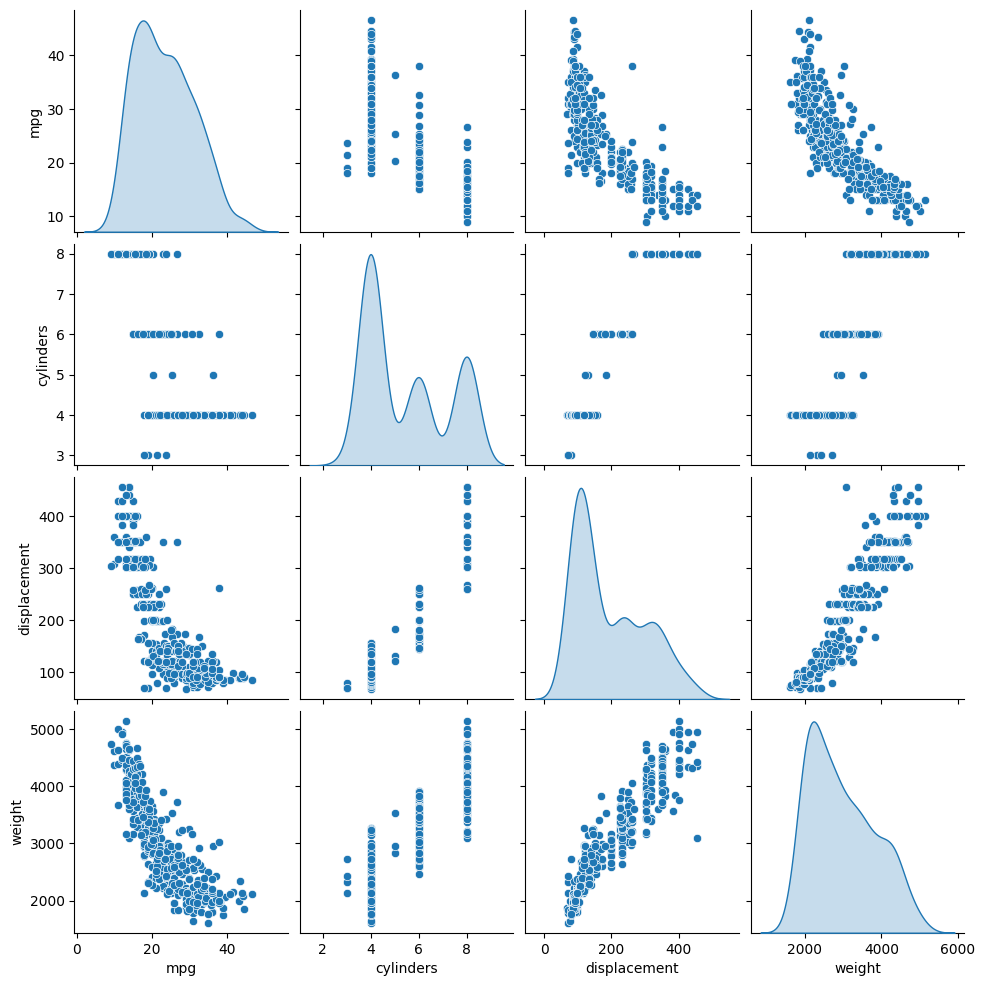

In [ ]:
sns.pairplot(df[["mpg", "cylinders", "displacement", "weight"]], diag_kind="kde")





In [67]:
from sklearn.model_selection import train_test_split
X=df[[ "cylinders", "displacement", "weight"]]
y=df['mpg']
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [68]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [69]:
lr.fit(X_train,y_train)


LinearRegression()

In [70]:
y_pred= lr.predict(X_test) 


/var/folders/4v/gmw01j1s3p1c2pb8htmjqj_w0000gn/T/ipykernel_72116/3987813830.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_pred, bins = 20)
/var/folders/4v/gmw01j1s3p1c2pb8htmjqj_w0000gn/T/ipykernel_72116/3987813830.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


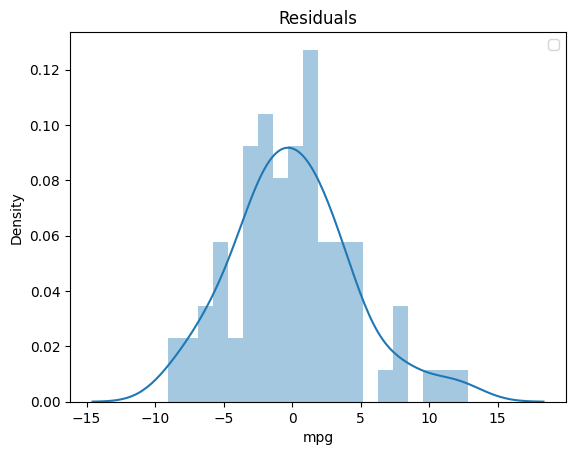

In [71]:
sns.distplot(y_test - y_pred, bins = 20)
plt.legend()
plt.title("Residuals")
plt.show()